In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('V4.csv')

In [4]:
df.head(10)

,Unnamed: 0,DATE_ID,CAMPAIGN,KEYWORD,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag,CAMP_ID,week,KW_ID,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded,cluster_assignment,cluster_name
0,0,20170521,Non Brand | Condition | Geo,symptoms of asthma,2.08,3,1.80,51,5.40,0.058824,1,1,7,1,2,0,1,0,0,1,13,asthma symptoms and causes
1,1,20170521,Brand,product1 spacer,1.00,0,0.00,2,0.00,0.000000,0,2,7,2,2,0,1,0,1,0,1,"product1 inhaler/spacer uses, coupons & instru..."
2,2,20170521,Non Brand | Treatment | National,how to prevent asthma,1.48,0,0.00,4,0.00,0.000000,0,3,7,3,2,0,1,0,0,1,2,"asthma facts, causes, prevention & relief/control"
3,3,20170521,Non Brand | Info | Geo,facts about asthma,0.00,0,0.00,0,0.00,0.000000,0,4,7,4,2,1,0,0,0,1,2,"asthma facts, causes, prevention & relief/control"
4,4,20170521,Non Brand | Condition | Geo,asthma symptoms in children,0.00,0,0.00,0,0.00,0.000000,0,1,7,5,2,1,0,0,0,1,19,asthma symptoms & causes in children
5,5,20170521,Non Brand | Treatment | Geo,how to reduce asthma symptoms,2.00,0,0.00,1,0.00,0.000000,0,5,7,6,2,0,1,0,0,1,13,asthma symptoms and causes
6,6,20170521,Non Brand | Condition | Geo,breathing with asthma,2.00,1,3.71,4,3.71,0.250000,1,1,7,7,2,0,1,0,0,1,0,asthma breathing problems & exercises
7,7,20170521,Non Brand | Competitor | Geo,alternatives to competitor6,4.00,0,0.00,1,0.00,0.000000,0,6,7,8,2,0,1,0,0,1,7,competitors2678 aerosol uses & alternatives
8,8,20170521,Non Brand | Product | Geo,best inhaler for asthma,3.31,0,0.00,7,0.00,0.000000,0,7,7,9,2,0,1,0,0,1,3,"asthma inhaler brands, uses & side effects"
9,9,20170521,Non Brand | Product | Geo,asthmatic inhalers,4.00,0,0.00,3,0.00,0.000000,0,7,7,10,2,0,1,0,0,1,16,"asthma inhalers types, uses & side effects"


In [5]:
df = df.drop(["Unnamed: 0"], axis=1)

#### Review top 100 keywords

In [6]:
df.cluster_assignment.value_counts()

2     151908
1      79673
7      50385
13     23306
4      21735
8      17398
3      17150
16     16642
5      13064
19     12694
11     11936
14     10690
9       9383
15      9031
17      8834
12      8783
0       8396
6       6401
10      6158
18      5200
Name: cluster_assignment, dtype: int64

In [7]:
Counter(df.KEYWORD).most_common(100)

[('asthma inhalers', 1771),
 ('asthma medications', 1725),
 ('inhalers for asthma', 1713),
 ('asthma relief', 1688),
 ('asthma symptoms', 1678),
 ('asthma medication', 1644),
 ('asthma coughing', 1618),
 ('asthma action plan', 1614),
 ('asthma symptom', 1605),
 ('what is asthma', 1601),
 ('symptoms of asthma', 1598),
 ('asthma inhaler', 1597),
 ('asthma medicine', 1581),
 ('asthma treatment', 1577),
 ('help asthma', 1551),
 ('asthma medicines', 1539),
 ('competitor5 inhaler', 1489),
 ('asthma triggers', 1481),
 ('competitor6 inhaler', 1477),
 ('what causes asthma', 1476),
 ('asthma control', 1466),
 ('treatment for asthma', 1444),
 ('over the counter asthma inhalers', 1443),
 ('medicine for asthma', 1433),
 ('asthma treatments', 1430),
 ('cause asthma', 1430),
 ('how to treat asthma', 1427),
 ('help with asthma', 1420),
 ('symptom of asthma', 1406),
 ('inhalation aerosol', 1401),
 ('asthma prevention', 1389),
 ('signs of asthma', 1376),
 ('medications for asthma', 1369),
 ('product1', 

#### Train/Test split

In [7]:
df.Flag.value_counts()

0.0    405574
1.0     83193
Name: Flag, dtype: int64

In [7]:
#Remove CPC and keep media_cost
X = df.drop(['DATE_ID','CAMPAIGN','KEYWORD','IMPRESSIONS','CTR','Flag','CLICKS','CPC','cluster_name','KW_ID'],axis=1)
Y = df['Flag'].values

In [27]:
#Remove media_cost and keep CPC - SIMILAR WITH THE FIRST SET
X = df.drop(['DATE_ID','CAMPAIGN','KEYWORD','IMPRESSIONS','CTR','Flag','CLICKS','MEDIA_COST','cluster_name','KW_ID'],axis=1)
Y = df['Flag'].values

In [46]:
#Remove media_cost and CPC - NO
X = df.drop(['DATE_ID','CAMPAIGN','KEYWORD','IMPRESSIONS','CTR','Flag','CLICKS','MEDIA_COST','CPC',
             'cluster_name','KW_ID'],axis=1)
Y = df['Flag'].values

In [8]:
X['CAMP_ID'].isnull().sum()

0

In [9]:
np.isfinite(Y).all()

True

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=113)

In [9]:
x_train.head()

,_POSITION,MEDIA_COST,CAMP_ID,week,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded,cluster_assignment
86300,1.43,0.0,6,3,1,1,0,0,0,1,5
326528,3.44,0.0,10,5,2,0,1,0,0,1,2
2295,6.00,0.0,7,5,2,1,0,0,0,1,16
373315,3.00,0.0,9,2,2,0,1,0,0,1,9
181833,3.25,0.0,4,2,4,0,1,0,0,1,2


#### Random Forest Classifier predicting CTR Flag

In [11]:
clf = RandomForestClassifier(max_depth=15, random_state=114)

In [12]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=114)

In [13]:
y_pred_class = clf.predict(x_test)

In [14]:
y_pred_prob = clf.predict_proba(x_test)[:,1]

In [15]:
importances = clf.feature_importances_

In [16]:
indices = np.argsort(importances)[::-1]

In [17]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

1. feature MEDIA_COST (0.914652)
2. feature _POSITION (0.036148)
3. feature cluster_assignment (0.014355)
4. feature CAMP_ID (0.010735)
5. feature CAMPAIGN_TYPE_Branded (0.006827)
6. feature CAMPAIGN_TYPE_Unbranded (0.005966)
7. feature Q (0.004315)
8. feature week (0.004051)
9. feature NETWORK_Bing (0.001508)
10. feature NETWORK_Google (0.001388)
11. feature NETWORK_Yahoo (0.000058)


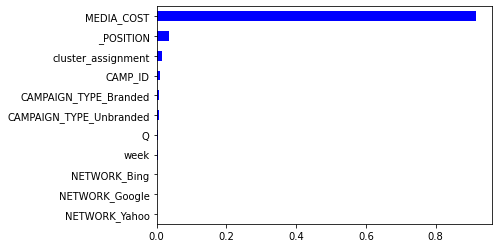

In [18]:
import matplotlib.pyplot as plt

importances_df = pd.Series(clf.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_df = importances_df.sort_values()
# Make a horizontal bar plot
sorted_importances_df.plot(kind='barh', color='blue')
plt.show()

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    121744
           1       0.91      0.99      0.95     24887

    accuracy                           0.98    146631
   macro avg       0.95      0.98      0.97    146631
weighted avg       0.98      0.98      0.98    146631



In [20]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[119257,   2487],
       [   336,  24551]], dtype=int64)

In [21]:
metrics.accuracy_score(y_test, y_pred_class)

0.9807475908914213

In [22]:
sk.metrics.roc_auc_score(y_test, y_pred_prob)

0.9968659033733247

In [23]:
y_pred_train = clf.predict(x_train)

print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    283830
           1       0.93      0.99      0.96     58306

    accuracy                           0.99    342136
   macro avg       0.96      0.99      0.98    342136
weighted avg       0.99      0.99      0.99    342136



In [24]:
false_positive_rate, true_positive_rate, threshold = sk.metrics.roc_curve(y_test, y_pred_prob)

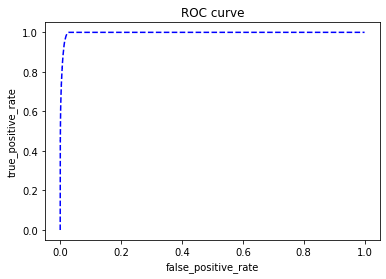

In [25]:
plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, color='b', ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [26]:
Y_clf = clf.predict(X)

In [27]:
df0 = pd.read_csv('V4.csv')

In [28]:
df0['RF_classsifier_prediction'] = Y_clf

In [29]:
df0.head()

,Unnamed: 0,DATE_ID,CAMPAIGN,KEYWORD,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag,CAMP_ID,week,KW_ID,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded,cluster_assignment,cluster_name,RF_classsifier_prediction
0,0,20170521,Non Brand | Condition | Geo,symptoms of asthma,2.08,3,1.8,51,5.4,0.058824,1,1,7,1,2,0,1,0,0,1,13,asthma symptoms and causes,1
1,1,20170521,Brand,product1 spacer,1.00,0,0.0,2,0.0,0.000000,0,2,7,2,2,0,1,0,1,0,1,"product1 inhaler/spacer uses, coupons & instru...",0
2,2,20170521,Non Brand | Treatment | National,how to prevent asthma,1.48,0,0.0,4,0.0,0.000000,0,3,7,3,2,0,1,0,0,1,2,"asthma facts, causes, prevention & relief/control",0
3,3,20170521,Non Brand | Info | Geo,facts about asthma,0.00,0,0.0,0,0.0,0.000000,0,4,7,4,2,1,0,0,0,1,2,"asthma facts, causes, prevention & relief/control",0
4,4,20170521,Non Brand | Condition | Geo,asthma symptoms in children,0.00,0,0.0,0,0.0,0.000000,0,1,7,5,2,1,0,0,0,1,19,asthma symptoms & causes in children,0


#### XGboost Classifier predicting CTR Flag

In [30]:
param_grid = {"n_estimators":[i*10 for i in range(5,50)], "learning_rate": [i*0.1 for i in range(1,18)], 
              "max_depth": [3,4,5], "gamma": [i*0.2 for i in range(1,30)]}

In [31]:
from xgboost import XGBClassifier

In [32]:
bst = XGBClassifier(random_state=243)

In [33]:
bst_Grid = sk.model_selection.RandomizedSearchCV(bst, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 5)

In [34]:
#x_train.KW_ID = pd.to_numeric(x_train.KW_ID)
x_train.CAMP_ID = pd.to_numeric(x_train.CAMP_ID)
#x_train.KW_ID.dtype, x_train.CAMP_ID.dtype

C:\Users\zjx04\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [35]:
bst_Grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                  

In [36]:
bst_Grid.best_params_

{'n_estimators': 410, 'max_depth': 4, 'learning_rate': 0.4, 'gamma': 1.8}

In [37]:
#x_test.KW_ID = pd.to_numeric(x_test.KW_ID)
x_test.CAMP_ID = pd.to_numeric(x_test.CAMP_ID)

C:\Users\zjx04\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
y_pred_xg = bst_Grid.best_estimator_.predict(x_test)
y_pred_xgprob = bst_Grid.best_estimator_.predict_proba(x_test)[:,1]

In [39]:
bst_Grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=410, n_jobs=0, num_parallel_tree=1, random_state=243,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
metrics.confusion_matrix(y_test, y_pred_xg)

array([[119284,   2460],
       [   449,  24438]], dtype=int64)

In [41]:
print(metrics.classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    121744
           1       0.91      0.98      0.94     24887

    accuracy                           0.98    146631
   macro avg       0.95      0.98      0.97    146631
weighted avg       0.98      0.98      0.98    146631



In [42]:
sk.metrics.roc_auc_score(y_test, y_pred_xgprob)

0.9967068134431026

In [43]:
metrics.accuracy_score(y_test, y_pred_xg)

0.980161084627398

In [48]:
y_pred_trainxg = bst_Grid.best_estimator_.predict(x_train)

print(metrics.classification_report(y_train, y_pred_trainxg))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    283830
           1       0.91      0.98      0.95     58306

    accuracy                           0.98    342136
   macro avg       0.95      0.98      0.97    342136
weighted avg       0.98      0.98      0.98    342136



In [49]:
false_positive_rate, true_positive_rate, threshold = sk.metrics.roc_curve(y_test, y_pred_xgprob)

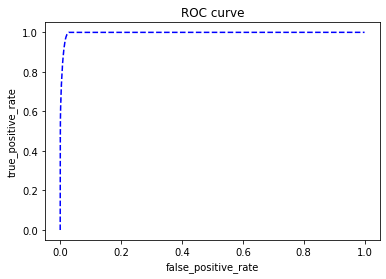

In [50]:
plt.title('ROC curve')
plt.plot(false_positive_rate, true_positive_rate, color='b', ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [51]:
X.CAMP_ID = pd.to_numeric(X.CAMP_ID)

In [52]:
Y_xgc = bst_Grid.best_estimator_.predict(X)

In [53]:
df0['XG_classsifier_prediction'] = Y_xgc

In [54]:
df0.head()

,Unnamed: 0,DATE_ID,CAMPAIGN,KEYWORD,_POSITION,CLICKS,CPC,IMPRESSIONS,MEDIA_COST,CTR,Flag,CAMP_ID,week,KW_ID,Q,NETWORK_Bing,NETWORK_Google,NETWORK_Yahoo,CAMPAIGN_TYPE_Branded,CAMPAIGN_TYPE_Unbranded,cluster_assignment,cluster_name,RF_classsifier_prediction,XG_classsifier_prediction
0,0,20170521,Non Brand | Condition | Geo,symptoms of asthma,2.08,3,1.8,51,5.4,0.058824,1,1,7,1,2,0,1,0,0,1,13,asthma symptoms and causes,1,1
1,1,20170521,Brand,product1 spacer,1.00,0,0.0,2,0.0,0.000000,0,2,7,2,2,0,1,0,1,0,1,"product1 inhaler/spacer uses, coupons & instru...",0,0
2,2,20170521,Non Brand | Treatment | National,how to prevent asthma,1.48,0,0.0,4,0.0,0.000000,0,3,7,3,2,0,1,0,0,1,2,"asthma facts, causes, prevention & relief/control",0,0
3,3,20170521,Non Brand | Info | Geo,facts about asthma,0.00,0,0.0,0,0.0,0.000000,0,4,7,4,2,1,0,0,0,1,2,"asthma facts, causes, prevention & relief/control",0,0
4,4,20170521,Non Brand | Condition | Geo,asthma symptoms in children,0.00,0,0.0,0,0.0,0.000000,0,1,7,5,2,1,0,0,0,1,19,asthma symptoms & causes in children,0,0


In [55]:
df0.to_csv('V5.csv')